In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/Top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

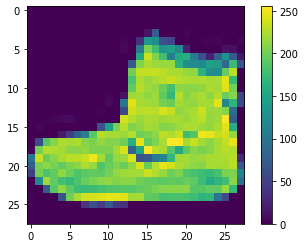

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

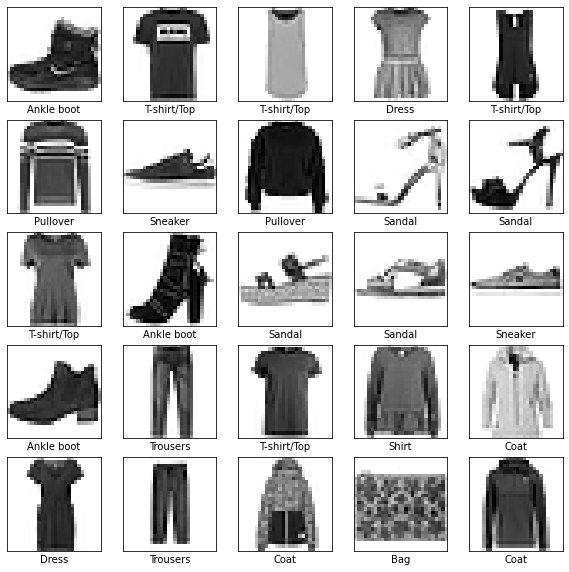

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#budowa modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.5006 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3737 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3343 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3143 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2548 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2436 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - los

In [12]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'Test modelu -> accuracy: {test_acc}, strata: {test_loss}')

313/313 - 1s - loss: 0.3410 - accuracy: 0.8824 - 614ms/epoch - 2ms/step
Test modelu -> accuracy: 0.8823999762535095, strata: 0.34100499749183655


In [13]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [15]:
predictions[0]

array([2.2526072e-09, 7.8375919e-09, 6.0181882e-10, 6.9422280e-12,
 3.5788190e-08, 2.5172913e-03, 5.1695462e-08, 1.0375038e-02,
 2.3774787e-07, 9.8710728e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9